# **Principal Component Analysis(PCA)**
- PCA (Principal Component Analysis) is a dimensionality reduction technique used in data analysis and machine learning.
- It helps to reduce the number of features in a dataset while keeping the most important information.
- It makes the large data set simpler, easy to explore and visualize. Also, it reduces the computational complexity of the model which makes machine learning algorithms run faster.

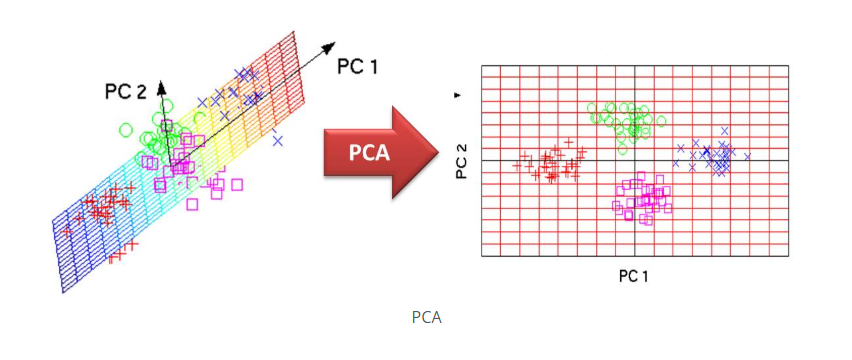

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Creating a sample dataset with features: Height, Weight, Age, and Gender
data = {
    'Height': [170, 165, 180, 175, 160, 172, 168, 177, 162, 158],
    'Weight': [65, 59, 75, 68, 55, 70, 62, 74, 58, 54],
    'Age':    [30, 25, 35, 28, 22, 32, 27, 33, 24, 21],
    'Gender': [1, 0, 1, 1, 0, 1, 0, 1, 0, 0]  # 1 = Male, 0 = Female
}

### **View the dataset**

In [ ]:
df = pd.DataFrame(data)
df

,Height,Weight,Age,Gender
0,170,65,30,1
1,165,59,25,0
2,180,75,35,1
3,175,68,28,1
4,160,55,22,0
5,172,70,32,1
6,168,62,27,0
7,177,74,33,1
8,162,58,24,0
9,158,54,21,0


### **Structure of the dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Height  10 non-null     int64
 1   Weight  10 non-null     int64
 2   Age     10 non-null     int64
 3   Gender  10 non-null     int64
dtypes: int64(4)
memory usage: 452.0 bytes


In [ ]:
df.describe()

,Height,Weight,Age,Gender
count,10.000000,10.00000,10.000000,10.000000
mean,168.700000,64.00000,27.700000,0.500000
std,7.439385,7.60117,4.762119,0.527046
min,158.000000,54.00000,21.000000,0.000000
25%,162.750000,58.25000,24.250000,0.000000
50%,169.000000,63.50000,27.500000,0.500000
75%,174.250000,69.50000,31.500000,1.000000
max,180.000000,75.00000,35.000000,1.000000


### **Check the Missing value**

In [ ]:
df.isnull().sum()

,0
Height,0
Weight,0
Age,0
Gender,0


###📶 **Data Preprocessing**

<Axes: >

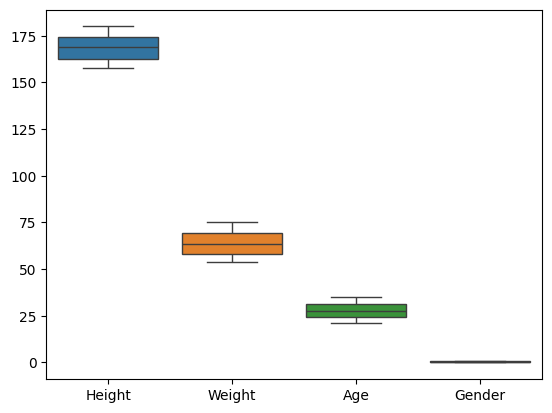

In [ ]:
sns.boxplot(data = df)

🔍From this boxplot, we can see that there are no outliers in these features. <br>
➡️To confirm this, we applied the IQR (interquartile range) method below:

In [ ]:
# Function to detect outliers using IQR
def detect_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers
# Detect outliers in numerical columns
numerical_cols = ['Height', 'Weight', 'Age']
for col in numerical_cols:
    outliers = detect_outliers_iqr(df, col)
    if not outliers.empty:
        print(f"Outliers in '{col}':")
        print(outliers)
    else:
        print(f"No outliers found in '{col}'")

No outliers found in 'Height'
No outliers found in 'Weight'
No outliers found in 'Age'


In [ ]:
# Separate the features (X) and target (y)
X = df.drop('Gender', axis=1)
y = df['Gender']

In [ ]:
X

,Height,Weight,Age
0,170,65,30
1,165,59,25
2,180,75,35
3,175,68,28
4,160,55,22
5,172,70,32
6,168,62,27
7,177,74,33
8,162,58,24
9,158,54,21


✅ Before applying PCA, the dataset must be scaled to ensure that all features are on the same scale

In [ ]:
# Using Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

array([[ 0.18419807,  0.13867505,  0.50910379],
       [-0.52425605, -0.69337525, -0.59764358],
       [ 1.60110632,  1.52542554,  1.61585117],
       [ 0.8926522 ,  0.5547002 ,  0.06640484],
       [-1.23271018, -1.24807544, -1.26169201],
       [ 0.46757972,  0.83205029,  0.95180275],
       [-0.09918358, -0.2773501 , -0.15494463],
       [ 1.17603385,  1.38675049,  1.17315222],
       [-0.94932853, -0.83205029, -0.81899306],
       [-1.51609183, -1.38675049, -1.48304149]])

In [ ]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
# Apply PCA to reduce dimensions to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split the dataset into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

In [ ]:
# Fit logistic regression on the PCA-transformed data
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [ ]:
# Predict on test data
y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 1])

🔍 It's predict 2 female (0) and 1 male(1)

In [ ]:
# Evaluate the model
score = model.score(X_test, y_test)
print(f"Model Accuracy: {score:.2f}")

Model Accuracy: 1.00


🔍 Yes! this model works properly and give 100% accuracy because of small dataset.

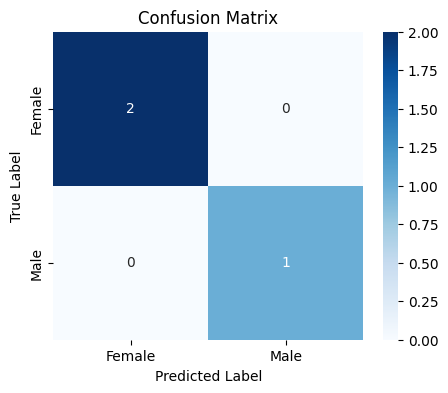

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Female', 'Male'], yticklabels=['Female', 'Male'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

**Comment:** The confusion matrix shows that the model achieved perfect classification performance for this dataset. It correctly predicted all cases without any misclassification. Specifically, the model identified both actual Female instances correctly (2 true positives) and correctly classified the single Male instance (1 true negative). There were no false positives or false negatives, meaning the model did not confuse one class for the other. As a result, the accuracy, precision, and recall for both classes are all 100%, indicating flawless prediction on the given data.

🧑‍💻 **Visualizing the PCA**

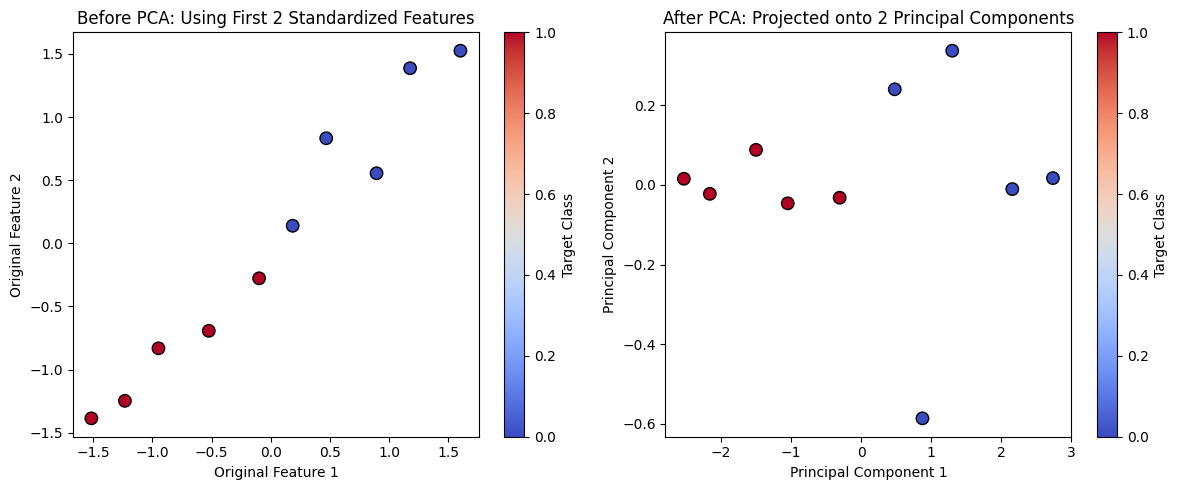

In [ ]:
# Factorize gender labels for color mapping (0 = Female, 1 = Male)
y_numeric = pd.factorize(y)[0]

plt.figure(figsize=(12, 5))

# Plot original standardized features before PCA
plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Original Feature 1')
plt.ylabel('Original Feature 2')
plt.title('Before PCA: Using First 2 Standardized Features')
plt.colorbar(label='Target Class')

# Plot PCA-reduced features
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_numeric, cmap='coolwarm', edgecolor='k', s=80)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('After PCA: Projected onto 2 Principal Components')
plt.colorbar(label='Target Class')

plt.tight_layout()
plt.show()

**Comment:** The left plot shows the dataset in its original standardized feature space, where the two features are highly correlated, as indicated by the strong diagonal trend. In this form, both axes contain overlapping information, resulting in redundancy. <br> On the other hand, the right plot, represents the same data after applying Principal Component Analysis (PCA), where the axes are rotated to form new variables called principal components that do simplify the data, remove correlations, and focus on the most important patterns without losing much information.